# Healthy or Sick Classifier

### Prepare Data

In [2]:
import sys
sys.path.append("..")
import numpy as np
import sklearn as sk
from sklearn.metrics import classification_report
import torch
from torch import nn, cuda
import matplotlib.pyplot as plt
import prepare_data
from prepare_data import DataPreparationContext
from prepare_data import ClassEmbedders
import models
from models import GenericMutliClassifier

In [3]:
data_context = DataPreparationContext(combine_riskiest=16, verbose=True)

training_data = data_context.prepare_from_file("../../symptom_sum_top16/train.pkl", oversample=True)
X_train_np = training_data['X']
y_train_np = training_data['y']

validation_data = data_context.prepare_from_file("../../symptom_sum_top16/val.pkl", oversample=False)
X_val_np = validation_data['X']
y_val_np = validation_data['y']

 94%|█████████▍| 20010/21300 [00:10<00:00, 1479.78it/s]

Not enough data! Skipping row. got: 7 rows, expected: 16


 95%|█████████▌| 20320/21300 [00:10<00:00, 1368.98it/s]

Not enough data! Skipping row. got: 11 rows, expected: 16
Not enough data! Skipping row. got: 9 rows, expected: 16
Not enough data! Skipping row. got: 8 rows, expected: 16


 98%|█████████▊| 20805/21300 [00:11<00:00, 1527.38it/s]

Not enough data! Skipping row. got: 10 rows, expected: 16


 99%|█████████▉| 21128/21300 [00:11<00:00, 1498.85it/s]

Not enough data! Skipping row. got: 13 rows, expected: 16


100%|██████████| 21300/21300 [00:11<00:00, 1858.99it/s]


Input File: ../../symptom_sum_top16/train.pkl
 [anxiety depression] has 16818
 [ptsd] has 16818
 [depression] has 16818
 [anxiety] has 16818
 [ptsd depression] has 16818
 [anxiety ptsd depression] has 16818
 [anxiety ptsd] has 16818
 [] has 16818



100%|██████████| 2662/2662 [00:01<00:00, 2103.86it/s]

Input File: ../../symptom_sum_top16/val.pkl
 [depression] has 63
 [anxiety depression] has 44
 [ptsd depression] has 2
 [anxiety] has 26
 [anxiety ptsd depression] has 7
 [ptsd] has 4
 [anxiety ptsd] has 3
 [] has 2103



## Deep Learning

### Convert to Tensors

In [4]:
X_train = models.convert_to_tensors(X_train_np).type(torch.float32).to(models.device)
y_train = models.convert_to_tensors(y_train_np).type(torch.LongTensor).to(models.device)
X_val = models.convert_to_tensors(X_val_np).type(torch.float32).to(models.device)
y_val = models.convert_to_tensors(y_val_np).type(torch.LongTensor).to(models.device)

### Define Model

The models used are based on tutorial:
```
Bourke , D 2022, PyTorch for Deep Learning & Machine Learning – Full Course, in freeCodeCamp.org (ed.), YouTube, viewed 6 May 2024, <https://www.youtube.com/watch?v=V_xro1bcAuA>.
```

### Train Model

Epoch: 500 | Loss: 0.39746, Acc: 87.23%, Val Acc: 77.66%
Epoch: 1000 | Loss: 0.16917, Acc: 95.20%, Val Acc: 81.53%
Epoch: 1500 | Loss: 0.08419, Acc: 97.78%, Val Acc: 87.17%
Epoch: 2000 | Loss: 0.04594, Acc: 98.83%, Val Acc: 89.70%
Epoch: 2500 | Loss: 0.02894, Acc: 99.23%, Val Acc: 90.36%
Epoch: 3000 | Loss: 0.01992, Acc: 99.57%, Val Acc: 91.03%
                         precision    recall  f1-score   support

                healthy       0.96      0.96      0.96      2103
                   ptsd       0.00      0.00      0.00         4
             depression       0.21      0.19      0.20        63
                anxiety       0.19      0.19      0.19        26
     anxiety depression       0.19      0.11      0.14        44
        ptsd depression       0.00      0.00      0.00         2
           anxiety ptsd       0.00      0.00      0.00         3
anxiety ptsd depression       0.00      0.00      0.00         7

               accuracy                           0.91      2252
 

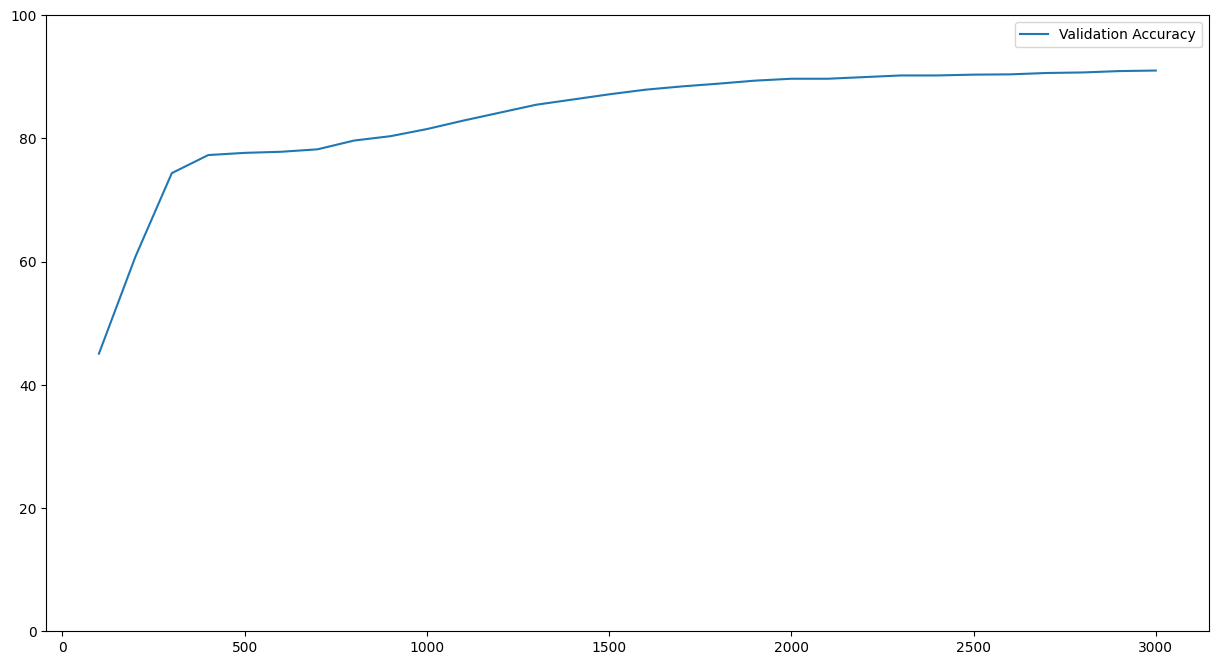

In [5]:
models.begin_plot()

hidden_layers = 250
epochs = 3000
learning_rate = 0.0001
labels = [(' '.join(x) if len(' '.join(x)) != 0 else 'healthy') for x in prepare_data.CLASSES_DEFAULT.values()]

model = models.GenericMutliClassifier(input_features=X_train.shape[1], output_features=8, hidden_units=hidden_layers, report_labels=labels).to(models.device)
report = model.train_model(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    epochs=epochs,
    learning_rate=learning_rate,
    should_print=True,
    should_plot=True,
    plot_label="Validation Accuracy"
)
print(report)
models.finish_plot()


### Save Model

In [6]:
model.save_model("1-healthy-or-not-multiclassifier.pth")